#### Author: Akash Kharita, Final Year, Integrated Masters of Technology, Geophysics, Indian Institute of Technology Roorkee
Date - 25/08/2021
MIT License - read the terms and conditions here - https://opensource.org/licenses/MIT

In [1]:
## Importing necessary dependencies
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from glob import glob
import os

#### We will be reuesting data from all the stations lying within 1 degree of Mount Saint Helens to investigate for triggered seismicity caused by surface waves resulting from 2021-07-29 Chignik Alaska Earthquake

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/MSH82_st_helens_plume_from_harrys_ridge_05-19-82.jpg/800px-MSH82_st_helens_plume_from_harrys_ridge_05-19-82.jpg' width=400 height=400 />

In [2]:
import obspy
from obspy.clients.fdsn.mass_downloader import CircularDomain, \
    Restrictions, MassDownloader

origin_time = obspy.UTCDateTime(2021, 7, 29, 6, 15, 49)

# Circular domain around the epicenter. This will download all data between
# 70 and 90 degrees distance from the epicenter. This module also offers
# rectangular and global domains. More complex domains can be defined by
# inheriting from the Domain class.
domain = CircularDomain(latitude=46.1912, longitude=-122.944,
                        minradius=0.0, maxradius=1.0)

restrictions = Restrictions(
    # Get data from 5 minutes before the event to one hour after the
    # event. This defines the temporal bounds of the waveform data.
    starttime=origin_time - 0 * 60,
    endtime=origin_time + 3600,
    # You might not want to deal with gaps in the data. If this setting is
    # True, any trace with a gap/overlap will be discarded.
    reject_channels_with_gaps=True,
    # And you might only want waveforms that have data for at least 95 % of
    # the requested time span. Any trace that is shorter than 95 % of the
    # desired total duration will be discarded.
    minimum_length=0.95,
    # No two stations should be closer than 10 km to each other. This is
    # useful to for example filter out stations that are part of different
    # networks but at the same physical station. Settings this option to
    # zero or None will disable that filtering.
    minimum_interstation_distance_in_m=1E3,
    # Only HH or BH channels. If a station has HH channels, those will be
    # downloaded, otherwise the BH. Nothing will be downloaded if it has
    # neither. You can add more/less patterns if you like.
    channel_priorities=["HH[ZNE]", "BH[ZNE]"],
    # Location codes are arbitrary and there is no rule as to which
    # location is best. Same logic as for the previous setting.
    location_priorities=["", "00", "10"])

# No specified providers will result in all known ones being queried.
mdl = MassDownloader()
# The data will be downloaded to the ``./waveforms/`` and ``./stations/``
# folders with automatically chosen file names.
mdl.download(domain, restrictions, mseed_storage="waveforms",
             stationxml_storage="stations")

[2021-08-25 11:04:37,629] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for BGR, EMSC, ETH, GEONET, GFZ, ICGC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2021-08-25 11:04:42,935] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does not have 'dataselect' and/or 'station' services.
[2021-08-25 11:04:44,213] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'USGS' as it does not have 'dataselect' and/or 'station' services.
[2021-08-25 11:04:45,006] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does not have 'dataselect' and/or 'station' services.
[2021-08-25 11:04:45,083] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 20 client(s): BGR, ETH, GEONET, GFZ, ICGC, INGV, IPGP, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, SCEDC, TEXNET, UIB-NORSAR, USP, ORFEUS, IRIS.
[2021-08-25 11:04:45,089] - obspy.clients.f

[2021-08-25 11:06:02,512] - obspy.clients.fdsn.mass_downloader - INFO: Client 'TEXNET' - Requesting reliable availability.
[2021-08-25 11:06:04,609] - obspy.clients.fdsn.mass_downloader - INFO: Client 'TEXNET' - No data available for request.
[2021-08-25 11:06:04,610] - obspy.clients.fdsn.mass_downloader - INFO: Client 'TEXNET' - No data available.
[2021-08-25 11:06:04,610] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-25 11:06:04,611] - obspy.clients.fdsn.mass_downloader - INFO: Client 'UIB-NORSAR' - Requesting unreliable availability.
[2021-08-25 11:06:05,265] - obspy.clients.fdsn.mass_downloader - INFO: Client 'UIB-NORSAR' - No data available for request.
[2021-08-25 11:06:05,266] - obspy.clients.fdsn.mass_downloader - INFO: Client 'UIB-NORSAR' - No data available.
[2021-08-25 11:06:05,266] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-25 11:06:05,267] - obspy.clients.fdsn.mass_downlo

[2021-08-25 11:15:29,675] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'stations/UO.NBFR.xml'.
[2021-08-25 11:15:29,753] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'stations/CC.VALT.xml'.
[2021-08-25 11:15:29,809] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'stations/CC.SUG.xml'.
[2021-08-25 11:15:30,347] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'stations/CC.SWF2.xml'.
[2021-08-25 11:15:30,364] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'stations/UO.GROV.xml'.
[2021-08-25 11:15:30,371] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'stations/UO.PF27.xml'.
[2021-08-25 11:15:30,910] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 'stations/UO.RAIN.xml'.
[2021-08-25 11:15:30,922] - obspy.clients.fdsn.mass_down

[2021-08-25 11:15:36,803] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NOA' - Acquired 0 StationXML files [0.0 MB].
[2021-08-25 11:15:36,804] - obspy.clients.fdsn.mass_downloader - INFO: Client 'RESIF' - Acquired 0 MiniSEED files [0.0 MB].
[2021-08-25 11:15:36,805] - obspy.clients.fdsn.mass_downloader - INFO: Client 'RESIF' - Acquired 0 StationXML files [0.0 MB].
[2021-08-25 11:15:36,806] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Acquired 0 MiniSEED files [0.0 MB].
[2021-08-25 11:15:36,807] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Acquired 0 StationXML files [0.0 MB].
[2021-08-25 11:15:36,808] - obspy.clients.fdsn.mass_downloader - INFO: Client 'TEXNET' - Acquired 0 MiniSEED files [0.0 MB].
[2021-08-25 11:15:36,809] - obspy.clients.fdsn.mass_downloader - INFO: Client 'TEXNET' - Acquired 0 StationXML files [0.0 MB].
[2021-08-25 11:15:36,809] - obspy.clients.fdsn.mass_downloader - INFO: Client 'UIB-NORSAR' - Acquired 0 MiniSEED files [0.0 

{'BGR': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc44935dc0>,
 'ETH': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc44935e20>,
 'GEONET': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc447eafd0>,
 'GFZ': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc447eaf70>,
 'ICGC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc447eaca0>,
 'INGV': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc447a4190>,
 'IPGP': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc447a4f10>,
 'KNMI': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc447a4640>,
 'KOERI': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7fdc447a41c0>,
 'LMU': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownlo

### Loading the waveform files 

In [16]:
sfiles = os.listdir('waveforms')
s = []
for i in range(len(sfiles)):
    s += obspy.read('waveforms//'+sfiles[i])

s = obspy.Stream(s)


### Selecting the North component as surface waves are best seen on horizontal channels and bandpass filtering between 2-8Hz to look out for potential tremor


In [254]:
s_north = s.select(channel='*HN')
s_n = s_north.copy()
t = np.linspace(0,3600,len(s_n[0].data))
s_n.trim(starttime = s_n[0].stats.starttime+t[np.argmax(s_n[0].data)]-10*60,endtime = s_n[0].stats.starttime+t[np.argmax(s_n[0].data)]+10*60)
s_n_f = s_n.copy()
s_n_f.filter(type='bandpass',freqmin=2,freqmax=8)
stn_list = ['PRO4','RUSH','SEP','SIFT','VALT','PF27','ARTIC','LEID','TOLE','LON']

### Visual inspection of filtered waveforms at the time of arrival of Surface waves

/tmp/ipykernel_95/2460537564.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=[15,3])


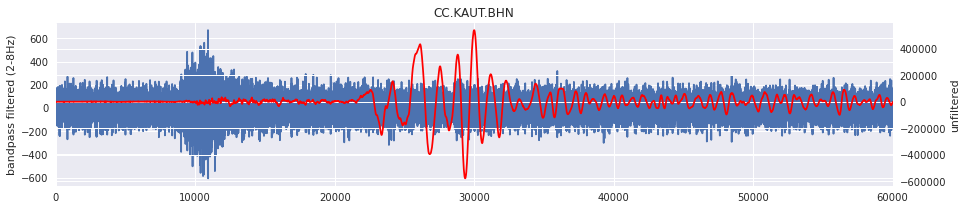

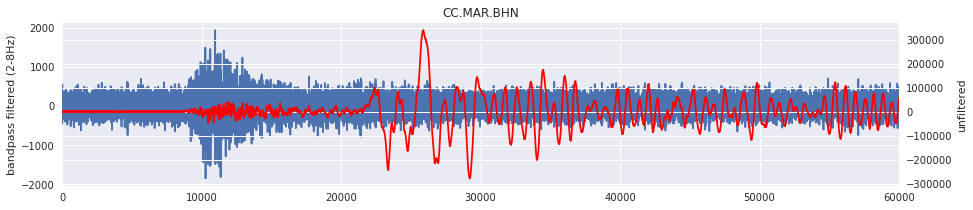

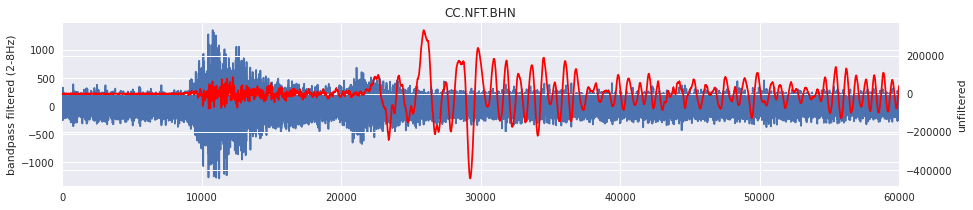

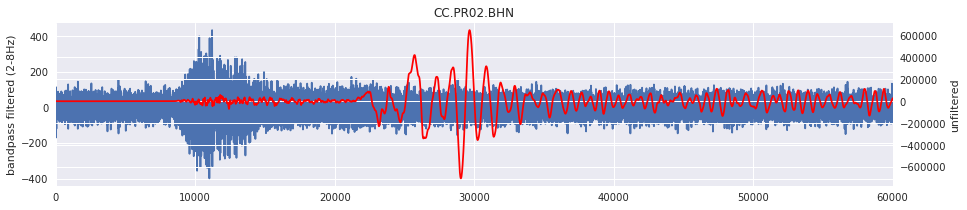

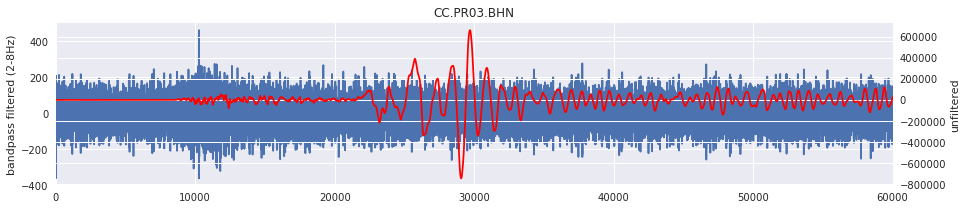

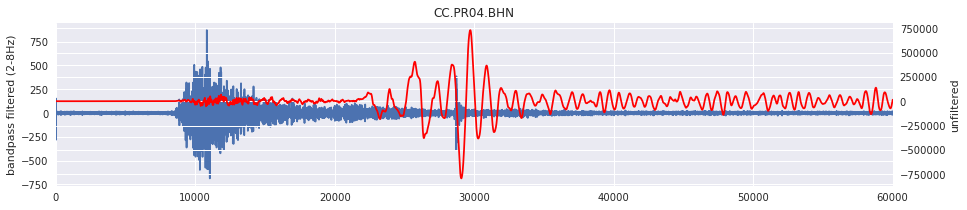

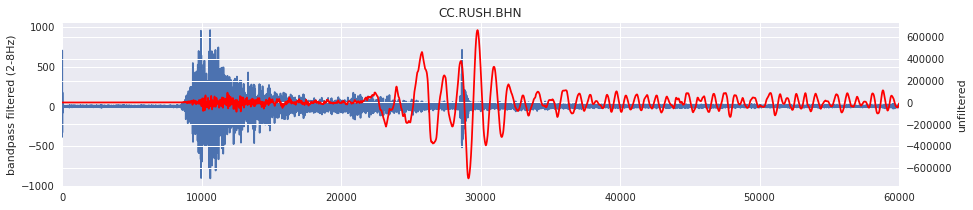

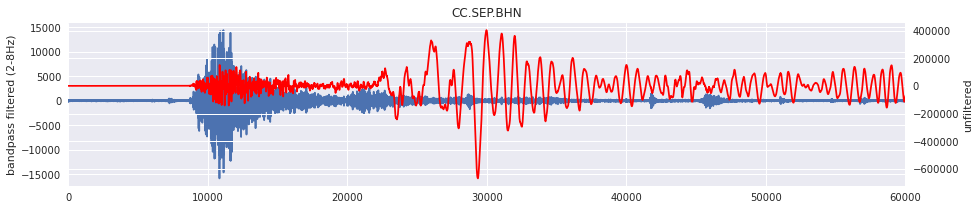

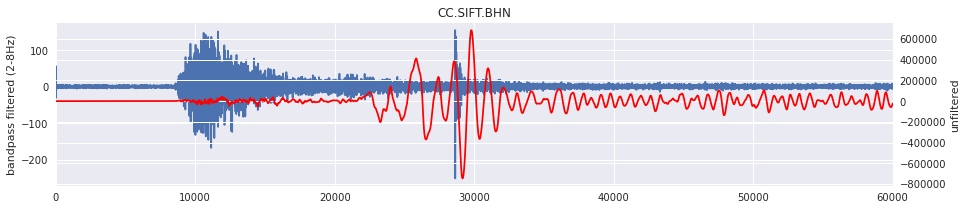

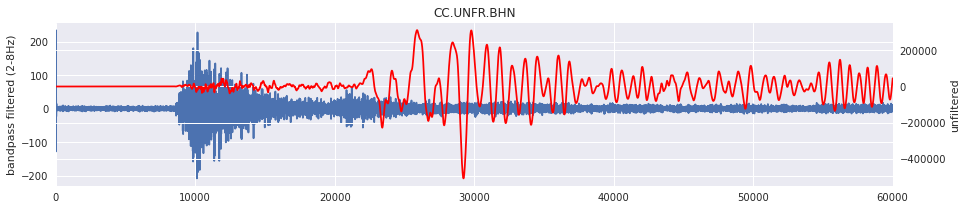

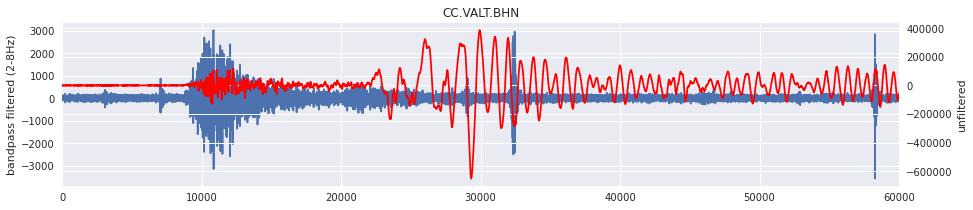

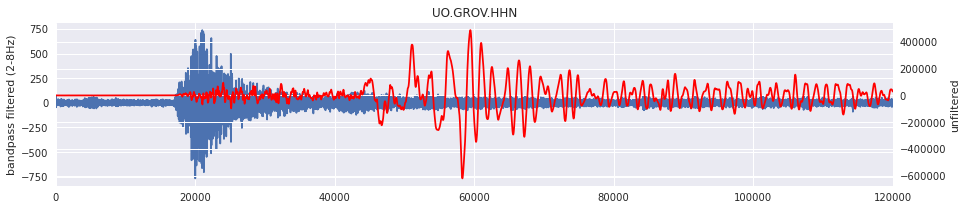

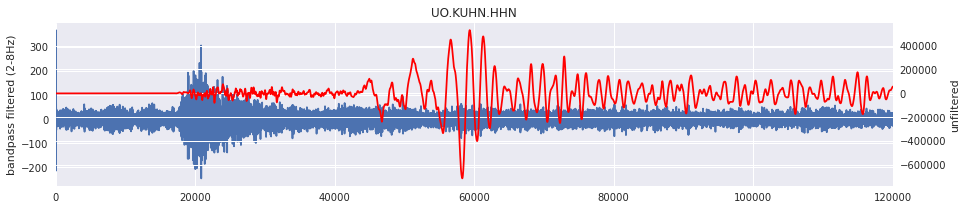

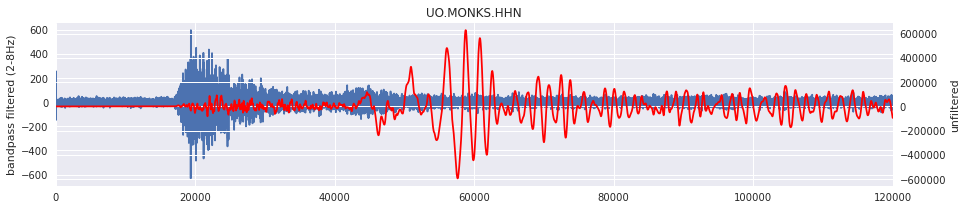

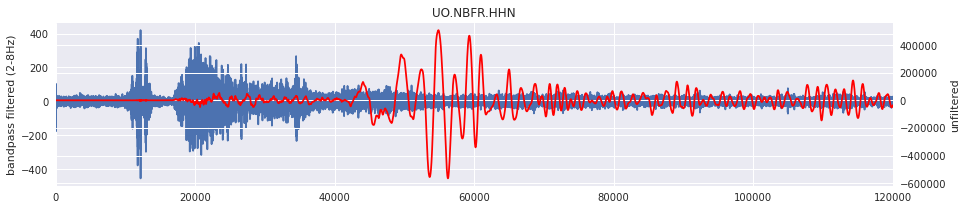

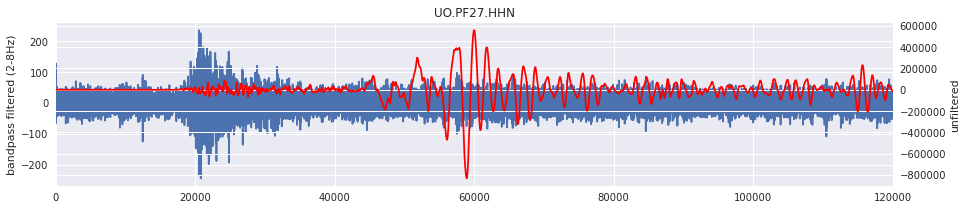

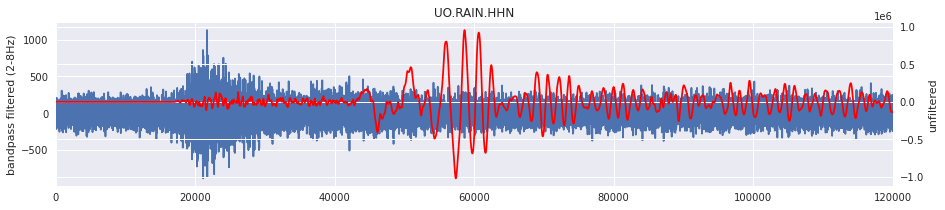

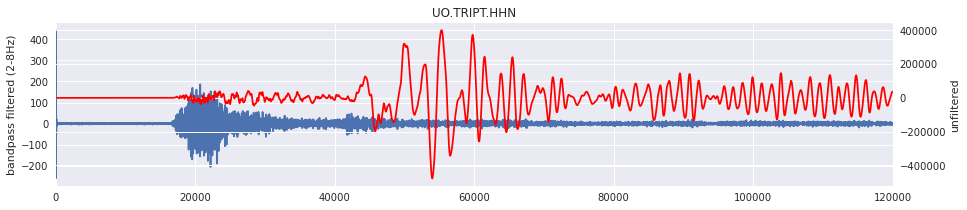

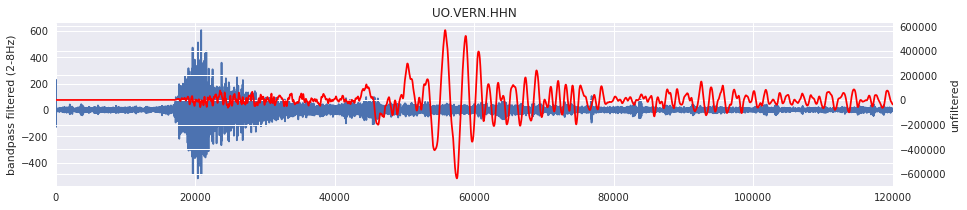

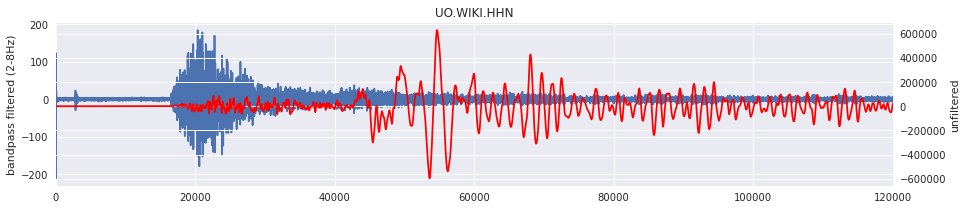

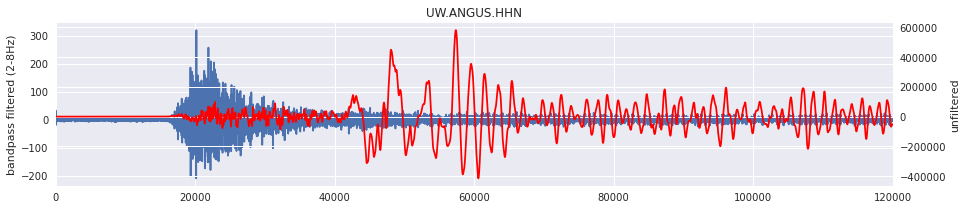

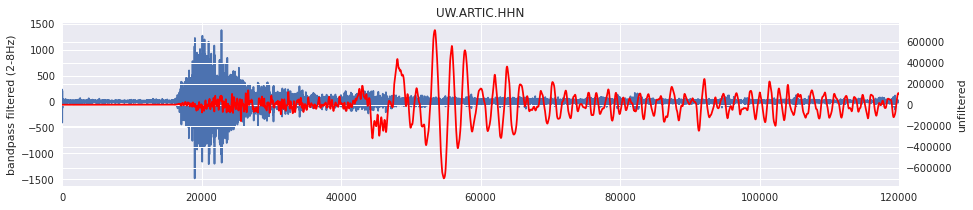

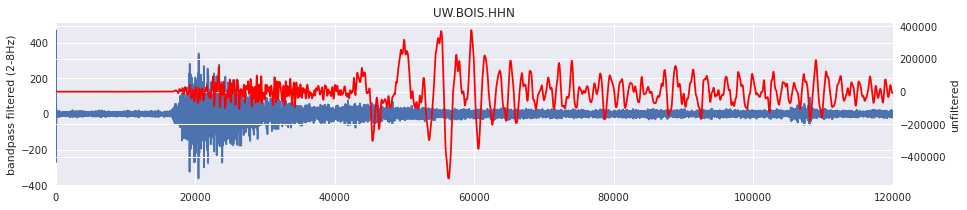

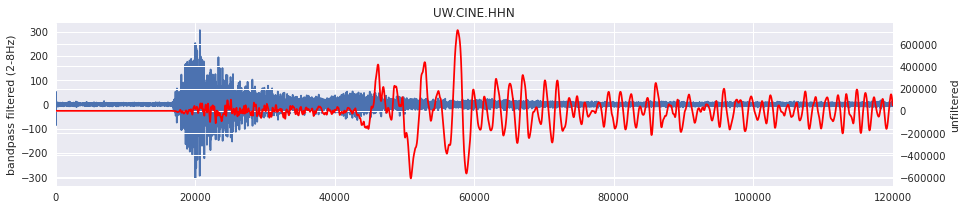

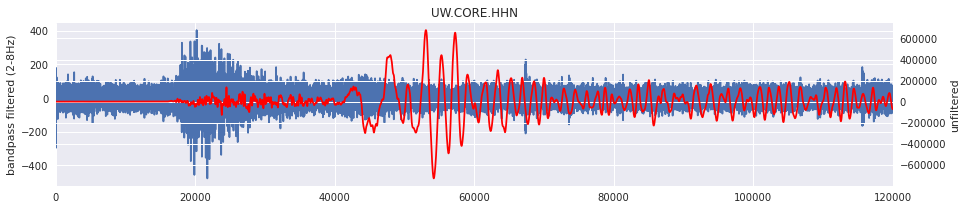

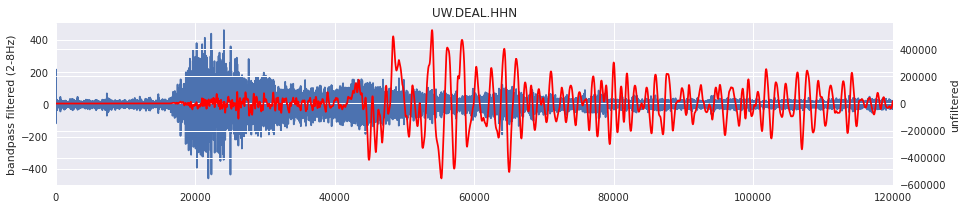

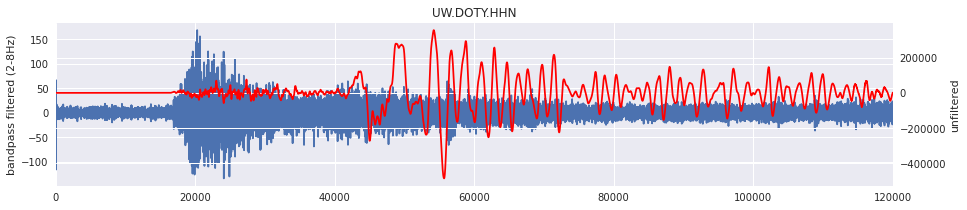

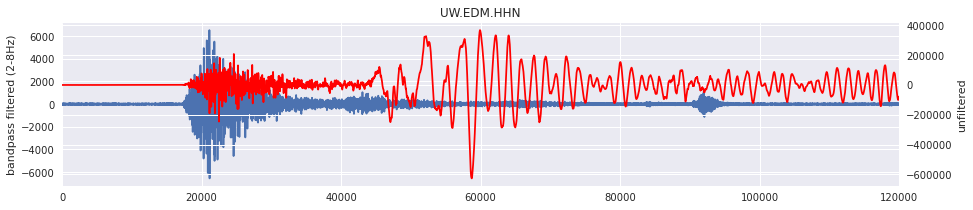

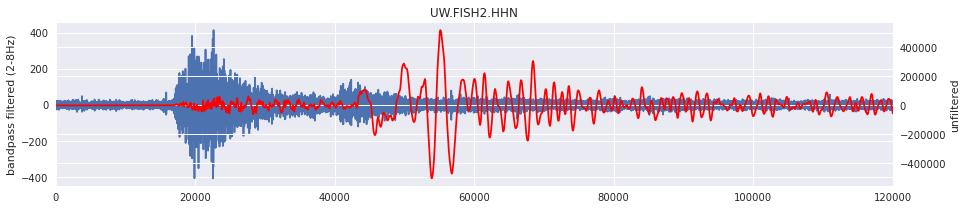

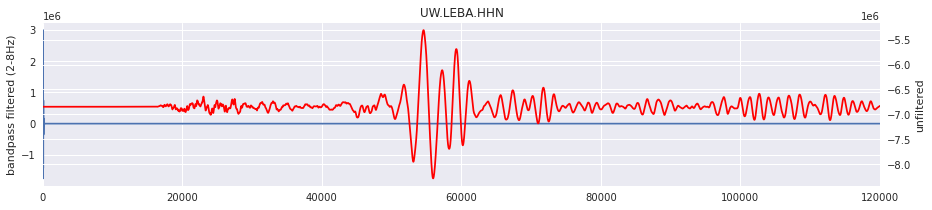

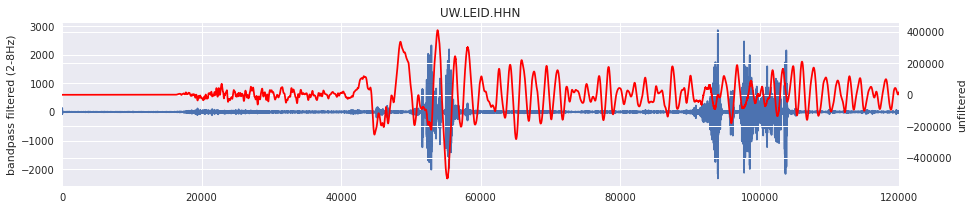

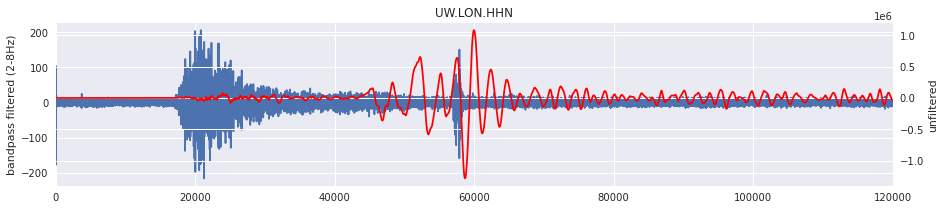

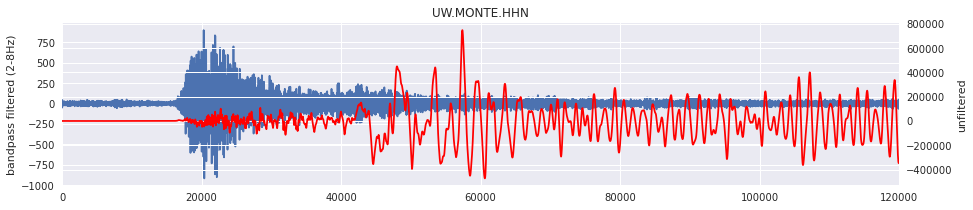

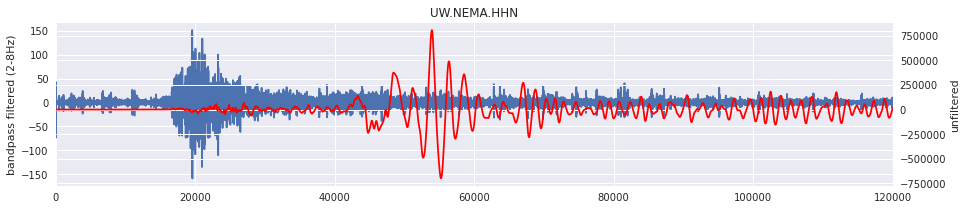

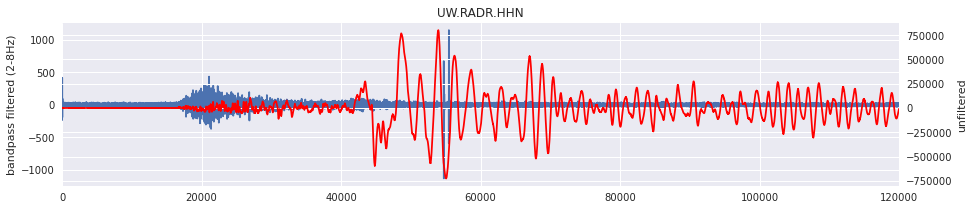

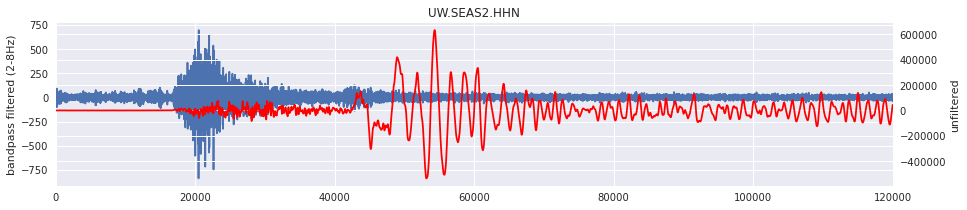

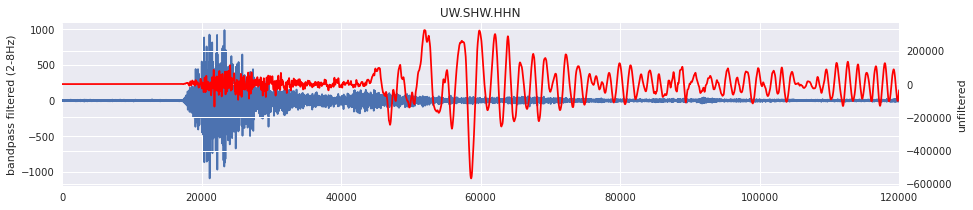

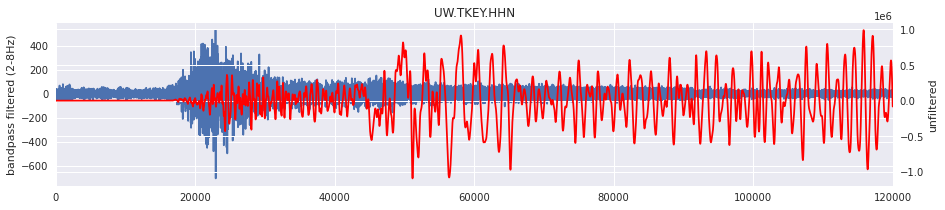

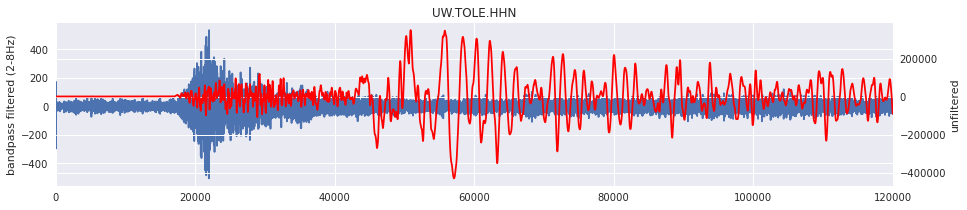

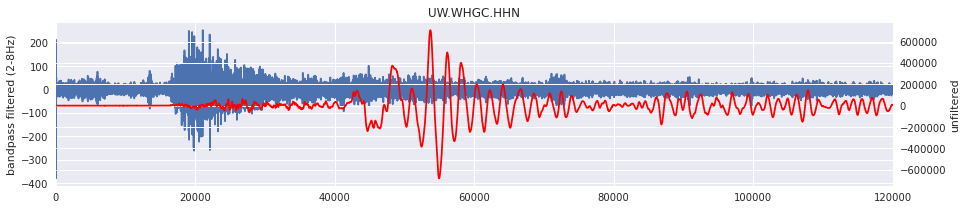

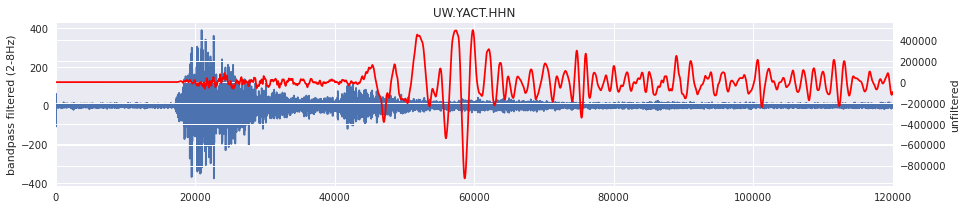

In [206]:
for i in range(len(s_n)):
    fig = plt.figure(figsize=[15,3])
    ax1 = fig.add_subplot(111)
    ax1.plot(s_n_f[i].data)
    ax1.set_ylabel('bandpass filtered (2-8Hz)')
    ax1.set_xlim(0,len(s_n_f[i].data))
    ax2 = ax1.twinx()
    ax2.plot(s_n[i],'r-',label='unfiltered')
    ax2.set_ylabel('unfiltered')
    plt.title(s_n[i].stats.network+'.'+s_n[i].stats.station+'.'+s_n[i].stats.channel)


### Looks like there are some stations of our interest!
lets list them 
CC.PRO4, CC.RUSH,CC.SIFT, CC.VALT,UW.LEID,UW.LON,UW.RADR

In [306]:
stn_list = ['PR04','RUSH','SIFT','VALT','LEID','LON','RADR']
a = []
b = []
for sta in stn_list:
    a += s_n.select(station=sta)
    b += s_n_f.select(station=sta)
a = obspy.Stream(a)

### Plotting spectrograms of stations of Interest

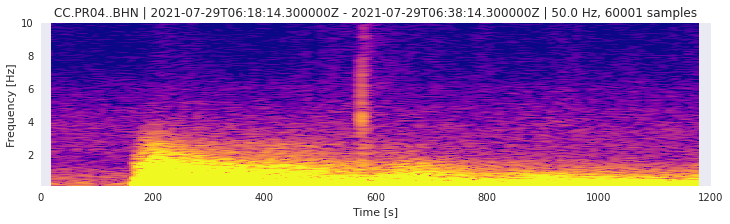

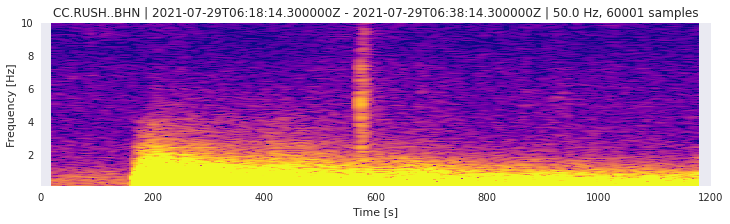

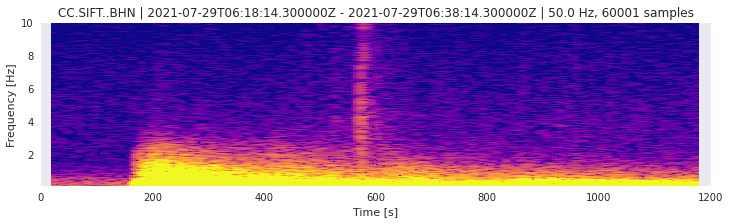

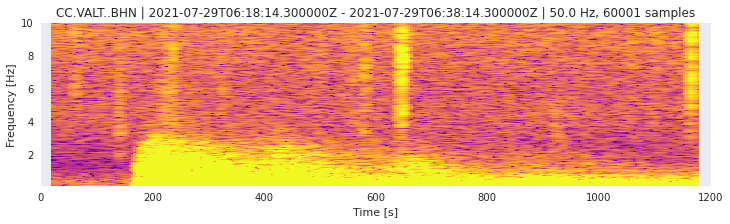

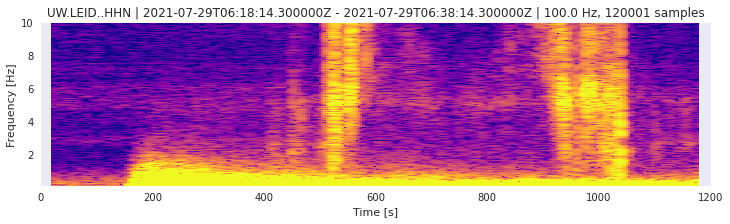

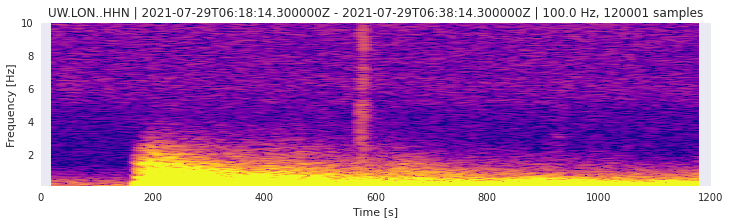

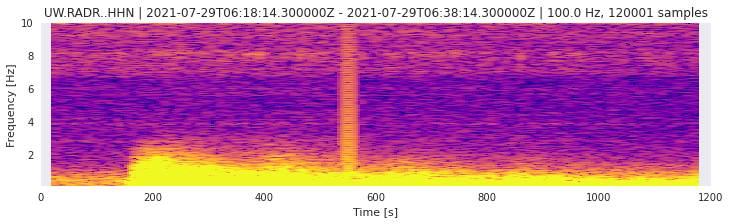

In [263]:
for i in range(len(a)):
    plt.rcParams['figure.figsize'] = 12,3
    fig = a[i].spectrogram(show=False,wlen=50,dbscale=True,cmap='plasma')
    ax = fig.axes[0]
    ax.set_ylim(0.1,10)
    #ax.set_xlim(400,800)
    im = ax.images[0]
    
    im.set_clim(vmin=-10,vmax=50)

### That consistent single line near the middle of the plots, just at the timing of arrival of surface waves resulting from M8.2 Chignik Earthquake shows evidence of a triggered local earthquake!

This event is missing from the PNSN catalog - https://pnsn.org/volcanoes/mount-st-helens
Further the spectrograms can also be seen at  - https://pnsn.org/spectrogram-image/2021/07/29/0630/volcanic/helenshttps://pnsn.org/spectrogram-image/2021/07/29/0630/volcanic/helens Notice the tremors around 6:28

Stations can be seen at  - https://ds.iris.edu/gmap/#network=CC,UW&station=VALT,LON,PR04,RUSH,SIFT,RADR,LEID&channel=BHZ,HHZ&starttime=2021-07-27&endtime=2021-08-02&latitude=46.1912&longitude=-122.1944&maxradius=1&drawingmode=radial&planet=earth

In [339]:
b = obspy.Stream(b)